In [1]:
import os
from glob import glob
from skimage import data, io, feature, color, exposure
import numpy as np
import cv2

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

# Paper: Face Recognition Based on HOG and Fast PCA Algorithm

    1- Viola Jones
    2- Resize = 64x128
    3- HOG:
        3780 HOG features
    4- PCA
    5- Normalização: median normalization method (Eq 10)
    

# declare functions

In [2]:
lfw2 = os.path.join('..', 'Data', 'lfw2')
def image_path(person, id_, lfw_folder = lfw2):
    return glob(os.path.join(lfw_folder, person, '*' + id_ + '.jpg'))[0]

In [3]:
'''
Parameters: 
    - img_matrix: (ndarray)
    - title: (string)
Output:
    - image plot
'''
def plt_img(img_matrix, title='Image', normalize=False):
    if normalize:
        plt.imshow(img_matrix, vmin=np.min(img_matrix), vmax=np.max(img_matrix), cmap='gray')
    else:
        io.imshow(img_matrix)
    plt.title(title)
    plt.show()

In [4]:
def plt_two_imgs(img_a, img_b, cmap='gray', normalize=False):
    f = plt.figure(figsize=(12, 8))
    f.add_subplot(1,2, 1)
    if normalize:
        plt.imshow(img_a, vmin=np.min(img_matrix), vmax=np.max(img_matrix), cmap=cmap)
    else:
        plt.imshow(img_a, cmap=cmap)
    f.add_subplot(1,2, 2)
    if normalize:
        plt.imshow(img_b, vmin=np.min(img_matrix), vmax=np.max(img_matrix), cmap=cmap)
    else:
        plt.imshow(img_b, cmap=cmap)
    
    plt.show(block=True)
    
    

In [5]:
'''
Parameters: 
- Path: The image should be in the working directory or a full path of image
should be given;
- color: Second argument is a flag which specifies the way image should be read.
    cv2.IMREAD_COLOR : Loads a color image. Any transparency of image
    will be neglected;
    cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode;
    cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel;
Note Instead of these three flags, you can simply pass integers 1, 0 or -1
respectively.
Output:
- img_array: (ndarray)
'''
def open_img(path, color=0):
    return cv2.imread(path, color)

In [6]:
'''
Parameters:
- path_img: A string representing the file name. The filename must include image format like .jpg, .png, etc.

- img: It is the image that is to be saved (ndarray).

Return Value: It returns true if image is saved successfully.
'''

def save_img(path_img, img):
    cv2.imwrite(path_img, img) 

In [7]:
def getDF(path):
    with open(path) as f:
        file_list = f.readlines()
    n = int(file_list[0].strip())
    df_inicial = pd.read_csv(path, sep='\t', skiprows=1, nrows=n, names=['pair_name_1', 'pair_id_1', 'pair_id_2'])
    df_inicial['pair_name_2'] = None
    df_secondary = pd.read_csv(path, sep='\t', skiprows=n+1, names=['pair_name_1', 'pair_id_1', 'pair_name_2', 'pair_id_2'])
    df = pd.concat([df_inicial, df_secondary])
    df = df.reset_index(drop=True)
    print(df.shape)
    return df

In [8]:
def plt_img_batch(df, show=False, limit=np.inf):
    for index, row in df.iterrows():
        plt_img(open_img(row['path_pair_id_1'], color=0), title=os.path.split(row['path_pair_id_1'])[-1].split('.')[0])
        plt_img(open_img(row['path_pair_id_2'], color=0), title=os.path.split(row['path_pair_id_2'])[-1].split('.')[0])
        if limit == index + 1:
            break

# example

In [9]:
# data_folder = os.path.abspath('..\\data\\')
data_folder = os.path.join('..', 'Data')
train_path = Path(data_folder, 'pairsDevTrain.txt')
test_path = Path(data_folder, 'pairsDevTest.txt')

In [10]:
df_train = getDF(train_path)
df_test = getDF(test_path)

(2200, 4)
(1000, 4)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [11]:
df_train['path_pair_id_1'] = df_train.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_1'])), axis=1)
df_train['path_pair_id_2'] = df_train.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_2'])) if x['pair_name_2']==None 
                                            else image_path(person=x['pair_name_2'], id_= str(x['pair_id_2'])), axis=1)

df_test['path_pair_id_1'] = df_test.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_1'])), axis=1)
df_test['path_pair_id_2'] = df_test.apply(lambda x: image_path(person=x['pair_name_1'], id_= str(x['pair_id_2'])) if x['pair_name_2']==None 
                                          else image_path(person=x['pair_name_2'], id_= str(x['pair_id_2'])), axis=1)

In [12]:
df_train.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2
0,1,2,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0001.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0002.jpg
1,3,4,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0003.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0004.jpg
2,1,2,Aaron_Sorkin,None,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0001.jpg,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0002.jpg
3,1,2,Abdel_Nasser_Assidi,None,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...
4,1,3,Abdullah,None,..\Data\lfw2\Abdullah\Abdullah_0001.jpg,..\Data\lfw2\Abdullah\Abdullah_0003.jpg


In [13]:
df_test.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2
0,13,14,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0014.jpg
1,13,16,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0016.jpg
2,1,2,Abdullatif_Sener,None,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...
3,1,3,Adel_Al-Jubeir,None,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...
4,1,2,Al_Pacino,None,..\Data\lfw2\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2\Al_Pacino\Al_Pacino_0002.jpg


# Viola Jones

In [14]:
def plot_rectangle(detected_faces, image, title='Image', cmap_type='gray', kwargs={'lw': 20.}):
    # Create figure and axes
    fig,ax = plt.subplots(1)
    # Display the image
    ax.imshow(image, cmap=cmap_type)
    plt.title(title)
    for (column, row, width, height) in detected_faces:
        rect = Rectangle(
                (column, row),
                width = width,
                height = height,
                fill=False,
                edgecolor='r',
                
                )
        # Add the patch to the Axes
        ax.add_patch(rect)
#     plt.axis('off')
    plt.show()

In [15]:
def crop_image(original_image, column, row, width, height):
    # the goal is crop the biggest area
    return original_image[row:row+height, column:column + width]


### Load the classifier and create a cascade object for face detection

In [16]:
cascade_path = os.path.join('..', 'haarcascades', 'haarcascade_frontalface_alt.xml')
face_cascade = cv2.CascadeClassifier(cascade_path)

## Problem: what image to use?
### Response: Use the biggest area

In [17]:
def crop_biggest_area(original_image, detected_faces):
    
    # the goal is crop the biggest area
    if len(detected_faces) == 0: # viola jones didnt recognize any face
        return original_image, (None, None, original_image.shape[0], original_image.shape[1])
    else:
        # detected_faces returns: column, row, width, height
        # So, assuming all width == height
        # get np.argmax of height
        id_max_max_width = np.argmax(detected_faces[:, -1])
        column, row, width, height = detected_faces[id_max_max_width]
        return crop_image(original_image, column, row, width, height), (column, row, width, height)

## Problem: images with differents shapes
### Response: Use the resize methods. So, cropped all images, then used resize methods to get a standard shape

### Update df_train and df_test

In [18]:
df_train['path_pair_id_1_cropped'] = df_train['path_pair_id_1'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_train['path_pair_id_1_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

df_train['path_pair_id_2_cropped'] = df_train['path_pair_id_2'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_train['path_pair_id_2_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

In [19]:
df_test['path_pair_id_1_cropped'] = df_test['path_pair_id_1'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_test['path_pair_id_1_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

df_test['path_pair_id_2_cropped'] = df_test['path_pair_id_2'].apply(lambda x: x.replace('lfw2', 'lfw2_cropped'))
_ = df_test['path_pair_id_2_cropped'].apply(lambda x: None if os.path.isdir(os.path.split(x)[0]) else os.mkdir(os.path.split(x)[0]))

In [20]:
df_train.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,1,2,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0001.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0002.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...
1,3,4,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0003.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0004.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...
2,1,2,Aaron_Sorkin,None,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0001.jpg,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0002.jpg,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...
3,1,2,Abdel_Nasser_Assidi,None,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...
4,1,3,Abdullah,None,..\Data\lfw2\Abdullah\Abdullah_0001.jpg,..\Data\lfw2\Abdullah\Abdullah_0003.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0001.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0003.jpg


In [21]:
df_test.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped
0,13,14,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0014.jpg,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...
1,13,16,Abdullah_Gul,None,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0013.jpg,..\Data\lfw2\Abdullah_Gul\Abdullah_Gul_0016.jpg,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...,..\Data\lfw2_cropped\Abdullah_Gul\Abdullah_Gul...
2,1,2,Abdullatif_Sener,None,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2\Abdullatif_Sener\Abdullatif_Sener...,..\Data\lfw2_cropped\Abdullatif_Sener\Abdullat...,..\Data\lfw2_cropped\Abdullatif_Sener\Abdullat...
3,1,3,Adel_Al-Jubeir,None,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2\Adel_Al-Jubeir\Adel_Al-Jubeir_000...,..\Data\lfw2_cropped\Adel_Al-Jubeir\Adel_Al-Ju...,..\Data\lfw2_cropped\Adel_Al-Jubeir\Adel_Al-Ju...
4,1,2,Al_Pacino,None,..\Data\lfw2\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2\Al_Pacino\Al_Pacino_0002.jpg,..\Data\lfw2_cropped\Al_Pacino\Al_Pacino_0001.jpg,..\Data\lfw2_cropped\Al_Pacino\Al_Pacino_0002.jpg


# Paper: Face Recognition Based on HOG and Fast PCA Algorithm

    1- Viola Jones
    2- Resize = 64x128
    3- Concatenate pair => 64x256
    4- HOG:
        3780 HOG features => 7560
    4- PCA
    5- Normalização: median normalization method (Eq 10)
    

### Steps 1 and 2

In [22]:
def preprocessing(path_image, path_to_save, dim=(100, 100)):
    original_image = open_img(path_image, color=0)
    grayscale_image = original_image.copy()
    detected_faces = face_cascade.detectMultiScale(grayscale_image)# step 1
    cropped_image, (column, row, width, height) = crop_biggest_area(original_image, detected_faces)
    resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA) #step 2
    save_img(path_img=path_to_save, img=resized)
    return (column, row, width, height)

### get dimensions VJ and apply pre-processing

In [23]:
df_train['VJ_pair_id_1'] = df_train.apply(lambda x: preprocessing(path_image=x['path_pair_id_1'], path_to_save=x['path_pair_id_1_cropped'], dim=(64,128)), axis=1)
df_train['VJ_pair_id_2'] = df_train.apply(lambda x: preprocessing(path_image=x['path_pair_id_2'], path_to_save=x['path_pair_id_2_cropped'], dim=(64,128)), axis=1)

df_test['VJ_pair_id_1'] = df_test.apply(lambda x: preprocessing(path_image=x['path_pair_id_1'], path_to_save=x['path_pair_id_1_cropped'], dim=(64,128)), axis=1)
df_test['VJ_pair_id_2'] = df_test.apply(lambda x: preprocessing(path_image=x['path_pair_id_2'], path_to_save=x['path_pair_id_2_cropped'], dim=(64,128)), axis=1)

In [24]:
df_train.head()

,pair_id_1,pair_id_2,pair_name_1,pair_name_2,path_pair_id_1,path_pair_id_2,path_pair_id_1_cropped,path_pair_id_2_cropped,VJ_pair_id_1,VJ_pair_id_2
0,1,2,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0001.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0002.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,"(63, 63, 127, 127)","(69, 68, 114, 114)"
1,3,4,Aaron_Peirsol,None,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0003.jpg,..\Data\lfw2\Aaron_Peirsol\Aaron_Peirsol_0004.jpg,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,..\Data\lfw2_cropped\Aaron_Peirsol\Aaron_Peirs...,"(61, 61, 130, 130)","(70, 66, 112, 112)"
2,1,2,Aaron_Sorkin,None,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0001.jpg,..\Data\lfw2\Aaron_Sorkin\Aaron_Sorkin_0002.jpg,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...,..\Data\lfw2_cropped\Aaron_Sorkin\Aaron_Sorkin...,"(69, 69, 114, 114)","(63, 64, 125, 125)"
3,1,2,Abdel_Nasser_Assidi,None,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2\Abdel_Nasser_Assidi\Abdel_Nasser_...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...,..\Data\lfw2_cropped\Abdel_Nasser_Assidi\Abdel...,"(66, 66, 118, 118)","(68, 70, 113, 113)"
4,1,3,Abdullah,None,..\Data\lfw2\Abdullah\Abdullah_0001.jpg,..\Data\lfw2\Abdullah\Abdullah_0003.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0001.jpg,..\Data\lfw2_cropped\Abdullah\Abdullah_0003.jpg,"(64, 63, 125, 125)","(63, 64, 124, 124)"


(128, 64)


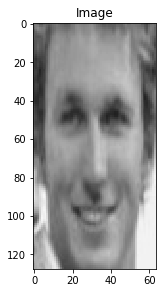

In [25]:
test_img = open_img(df_train.loc[0, 'path_pair_id_1_cropped'])
print(test_img.shape)
plt_img(test_img)

(128, 64)


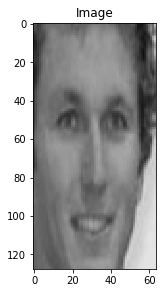

In [26]:
test_img = open_img(df_train.loc[0, 'path_pair_id_2_cropped'])
print(test_img.shape)
plt_img(test_img)

## Step: 3- Create pair and Concatenate

### Create pair

In [27]:
X_train_1 = np.array([open_img(img_1) for img_1 in df_train.loc[:,'path_pair_id_1_cropped'].values])
X_train_2 = np.array([open_img(img_2) for img_2 in df_train.loc[:,'path_pair_id_2_cropped'].values])

print(X_train_1.shape)
print(X_train_2.shape)

(2200, 128, 64)
(2200, 128, 64)


In [28]:
y_train = np.array([[1 if par==None else 0 for par in df_train.loc[:,'pair_name_2'].values]]).T

In [29]:
X_test_1 = np.array([open_img(img_1) for img_1 in df_test.loc[:,'path_pair_id_1_cropped'].values])
X_test_2 = np.array([open_img(img_2) for img_2 in df_test.loc[:,'path_pair_id_2_cropped'].values])

print(X_test_1.shape)
print(X_test_2.shape)

(1000, 128, 64)
(1000, 128, 64)


In [30]:
y_test = np.array([[1 if par==None else 0 for par in df_test.loc[:,'pair_name_2'].values]]).T

### Concatenate pair

In [31]:
X_train = np.append(X_train_1, X_train_2, axis=1)
X_train.shape

(2200, 256, 64)

In [32]:
X_test = np.append(X_test_1, X_test_2, axis=1)
X_test.shape

(1000, 256, 64)

In [33]:
concatenated_pair_shape = X_train[0].shape
concatenated_pair_shape

(256, 64)

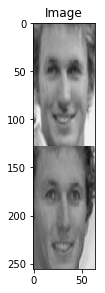

In [34]:
plt_img(X_train[0]) # train: instance 1: path_pair_id_1_cropped and path_pair_id_2_cropped

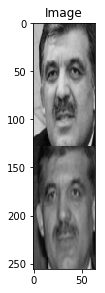

In [35]:
plt_img(X_test[0]) # test: instance 1: path_pair_id_1_cropped and path_pair_id_2_cropped

### Step 4: apply HOG in pre processed images (VJ + resize + concatenate)

In [44]:
hf, hog_image = feature.hog(X_train[0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                                  block_norm='L2', visualize=True, transform_sqrt=False, feature_vector=True, 
                                  multichannel=False)

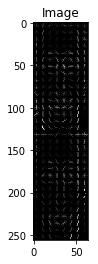

(7812,)


In [45]:
plt_img(hog_image, normalize=True)
print(hf.shape)

#### apply HOG: paper 3780 HOG features  -  in this experiment 7560 HOG features

In [36]:
X_train_HOG = np.array([feature.hog(concatenate_pair, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                                  block_norm='L2', visualize=False, transform_sqrt=False, feature_vector=True, 
                                  multichannel=False)
                      for concatenate_pair in X_train])

In [38]:
X_train_HOG.shape

(2200, 7812)

In [39]:
X_test_HOG = np.array([feature.hog(concatenate_pair, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
                                  block_norm='L2', visualize=False, transform_sqrt=False, feature_vector=True, 
                                  multichannel=False)
                      for concatenate_pair in X_test])

In [40]:
X_test_HOG.shape

(1000, 7812)

### Step 5: PCA

# Atenção:
- The Step 5 (PCA): is performed on resulting Hog Vector

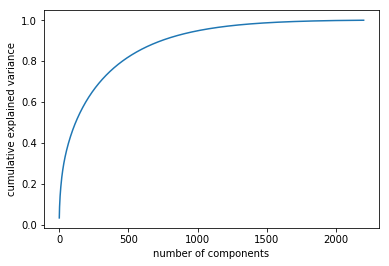

In [46]:
pca = PCA().fit(X_train_HOG)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [47]:
np.sum(pca.explained_variance_ratio_[:600])

0.8595301052631743

In [48]:
np.sum(pca.explained_variance_ratio_[:400])

0.7694618866547656

In [49]:
pca.set_params(**{'n_components':400})

PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [50]:
X_train_PCA = pca.fit_transform(X=X_train_HOG)

In [51]:
X_train_PCA.shape

(2200, 400)

In [52]:
X_test_PCA = pca.transform(X=X_test_HOG)

In [53]:
X_test_PCA.shape

(1000, 400)

### shuffle data

In [ ]:
arr = np.arange(y_train.shape[0])
np.random.shuffle(arr)
X = X_train_PCA[arr]
y_d = y_train[arr]

In [ ]:
print(X.shape)
print(y_d.shape)

## Grid SVM

In [54]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [55]:
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
param_grid = [
  {'C': [1, 5], 'degree': np.arange(1, 5, 2), 'kernel': ['poly']}
 ]
grid = GridSearchCV(SVC(), scoring='accuracy', n_jobs=-1, param_grid=param_grid, verbose=10)
grid.fit(X=X_train_PCA, y=y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   23.7s remaining:    5.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.0s finished
C:\Users\Rodolfo\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 5], 'degree': array([1, 3]),
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=10)

In [58]:
grid.best_score_

0.5609090909090909

In [59]:
grid.best_params_

{'C': 5, 'degree': 3, 'kernel': 'poly'}

In [60]:
clf_best = grid.best_estimator_

In [61]:
clf_best

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
clf_best.fit(X_train_PCA, y_train)

C:\Users\Rodolfo\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
y_pred_test = clf_best.predict(X_test_PCA)

In [65]:
accuracy_score(y_true=y_test, y_pred=y_pred_test)

0.621